In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()


In [3]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [4]:
# tokenize the input text, convert the raw text of string to a vocab of possible elements

stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there")) # list of integers that represent that string
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [5]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [6]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [7]:
# this is the first block

block_size = 8
train_data[:block_size + 1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [8]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [9]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data

    
    ix = torch.randint(len(data) - block_size, (batch_size,))


    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension, how many training examples, ie 32 samples
    for t in range(block_size): # time dimension, size of each of the 32 samples
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

In [10]:
print(xb) # input to transformer

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


In [11]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C) batch, time, channel

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):

            # get the predictions
            logits, loss = self(idx)

            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

SKIcLT;AcELMoTbvZv C?nq-QE33:CJqkOKH-q;:la!oiywkHjgChzbQ?u!3bLIgwevmyFJGUGp
wnYWmnxKWWev-tDqXErVKLgJ


In [ ]:
# create pytorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3) # learning rates = lr

In [16]:
batch_size = 32
for steps in range(10000): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())

2.4287540912628174


In [18]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=300)[0].tolist()))


Ayot hiaby ar:
Nowiknd p malendit mss. a whan.
Whame ty iow us hatolan! angien.


isoly ns be wins anes

Y:
LIngrou pr ho shinngmere ye! lorpad.
wir RTho nt f ilchincr sthieath sy trs adel frd, t.
'shat st ilfl R: hiso ss'lt w
Wisug ase aiselloul th tht ago

I hor woeloracangeryo h? gistowidepe os '


In [19]:
torch.manual_seed(1337)
B, T, C = 4, 8, 2
x = torch.randn(B, T, C)
x.shape

# information should only come from the back, forward
# channel is how much information each token carries

torch.Size([4, 8, 2])

In [ ]:
# We want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)

# this is inefficient

In [28]:
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim = True)
#wei

xbow2 = wei @ x # (B {TORCH ADDED},T,T) (B,T,C) --> (B, T, C)
torch.allclose(xbow, xbow2)

True

In [29]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T)) # how much tokens from the past do you want to aggregate
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1) # exponentiate and divide by the sum
xbow3 = wei @ x
torch.allclose(xbow, xbow3) 

True

In [22]:
x[0]

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])

In [23]:
xbow[0]

tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])

In [24]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3)) # returns the lower triangular portion
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [37]:
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16

key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)

value = nn.Linear(C, head_size, bias=False)

k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)

# how much each token attends to every other token
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)


tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x) # x is private to this token
out = wei @ v

out.shape


torch.Size([4, 8, 32])

In [38]:
wei[0] # note: the weights are not uniform. 

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

In [ ]:
k = torch.randn(B,T,head_size) # unit gaussian
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [43]:
'''
✅ Refactor multi-head attention into one class, like this:
Project all of the input into Q, K, V for all heads at once

Reshape the result so the heads become a new dimension

Do attention in a single tensor operation

Merge it back at the end with a linear layer

This is called batched multi-head attention, and it's what nanoGPT and transformers libraries do.
'''
        
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, n_head, head_size):
        super().__init__()

        self.n_head = n_head
        self.head_size = head_size
        self.dropout = nn.Dropout(dropout)

        # linear layer for q, k, v

        self.key = nn.Linear(n_embd, n_head * head_size, bias=False)
        self.query = nn.Linear(n_embd, n_head * head_size, bias=False)
        self.value = nn.Linear(n_embd, n_head * head_size, bias=False)
        self.proj = nn.Linear(n_embd, n_embd)

        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

    def forward(self, x):
        

        # (B, T, n_embd) → (B, T, n_head, head_size)

        B,T,C = x.shape


        k = self.key(x).view(B, T, self.n_head, self.head_size).transpose(1, 2)  # (B, n_head, T, head_size)
        q = self.query(x).view(B, T, self.n_head, self.head_size).transpose(1, 2)
        v = self.value(x).view(B, T, self.n_head, self.head_size).transpose(1, 2)


        wei = q @ k.transpose(-2, -1) * (self.head_size ** -0.5)  # (B, n_head, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim=-1)
        wei = self.dropout(wei)
        
        out = wei @ v  # (B, n_head, T, head_size)

        out = out.transpose(1, 2).contiguous().view(B, T, C)  # (B, T, n_embd)
        out = self.dropout(self.proj(out))  # Final linear projection

        return out

In [45]:
import torch
import time
import torch.nn as nn
import torch.nn.functional as F

# Config
B, T, C = 16, 32, 64
n_head = 4
head_size = C // n_head
n_embd = C
dropout = 0.0
block_size = T
device = 'cuda' if torch.cuda.is_available() else 'cpu'


# Input
x = torch.randn(B, T, C).to(device)

# Old style: with Head class (redefine here if needed)
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class OldMultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out



# Instantiate models
old_mha = OldMultiHeadAttention(n_head, head_size).to(device)
new_mha = MultiHeadAttention(n_head, head_size).to(device)

# Warm-up
_ = old_mha(x)
_ = new_mha(x)

# Timing function
def time_model(model, x, steps=100):

    torch.cuda.synchronize() if device == 'cuda' else None
    start = time.time()
    for _ in range(steps):
        _ = model(x)
    
    torch.cuda.synchronize() if device == 'cuda' else None
    
    return (time.time() - start) / steps


print("Benchmarking 100 steps...")
old_time = time_model(old_mha, x)
new_time = time_model(new_mha, x)

print(f"Old MHA (looped heads):  {old_time * 1000:.3f} ms per step")
print(f"New MHA (batched heads): {new_time * 1000:.3f} ms per step")
print(f"Speedup: {old_time / new_time:.2f}x faster")


Benchmarking 100 steps...
Old MHA (looped heads):  1.024 ms per step
New MHA (batched heads): 0.616 ms per step
Speedup: 1.66x faster


# RoPE

In [3]:
def rotate_half(x):

    """Rotates half the hidden dims of the input"""

    x1 = x[..., : x.shape[-1] // 2]
    x2 = x[..., x.shape[-1] // 2:]
    return torch.cat((-x2, x1), dim = -1)

def apply_rotary_pos_emb(q, k, cos, sin, pos_ids):
    # Shape of q/k: (B, T, H)
    # Shape of cos/sin: (T, H//2)

    B, T, H = q.shape
    assert H % 2 == 0, "Hidden dim must be even for RoPE"

    cos = cos[pos_ids]         # (T, H//2)
    sin = sin[pos_ids]         # (T, H//2)

    cos = cos.unsqueeze(0)     # (1, T, H//2)
    sin = sin.unsqueeze(0)     # (1, T, H//2)

    # Split q/k into halves
    q1, q2 = q[..., :H//2], q[..., H//2:]
    k1, k2 = k[..., :H//2], k[..., H//2:]

    q_rot = torch.cat([q1 * cos - q2 * sin, q1 * sin + q2 * cos], dim=-1)
    k_rot = torch.cat([k1 * cos - k2 * sin, k1 * sin + k2 * cos], dim=-1)

    return q_rot, k_rot



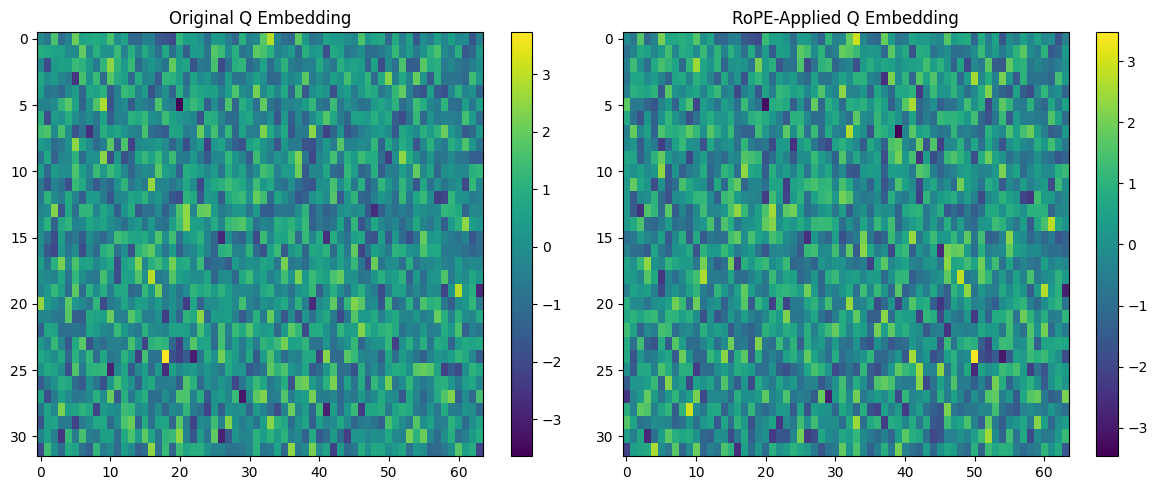

In [4]:
# === Setup dummy q, k, sin, cos tensors ===
B, T, H = 1, 32, 64
pos_ids = torch.arange(T)

q = torch.randn(B, T, H)
k = torch.randn(B, T, H)

theta = 10000 ** (torch.arange(0, H // 2).float() / H)
freqs = torch.einsum('i,j->ij', pos_ids.float(), 1.0 / theta)
sin = torch.sin(freqs)
cos = torch.cos(freqs)

# Apply RoPE
q_rot, k_rot = apply_rotary_pos_emb(q, k, cos, sin, pos_ids)

# === Visualize ===
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Original Q Embedding")
plt.imshow(q[0].numpy(), aspect='auto', cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("RoPE-Applied Q Embedding")
plt.imshow(q_rot[0].detach().numpy(), aspect='auto', cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()

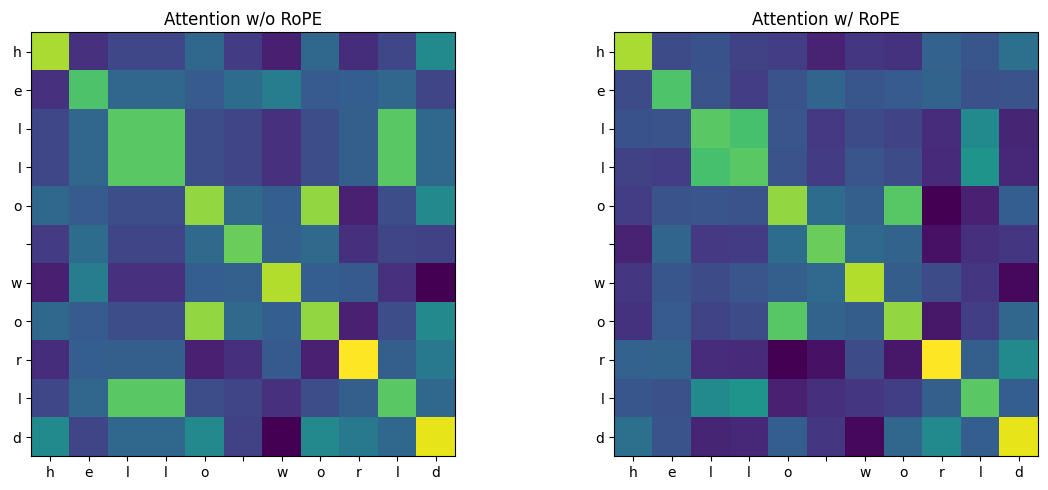

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# === Your functions ===
def rotate_half(x):
    x1 = x[..., : x.shape[-1] // 2]
    x2 = x[..., x.shape[-1] // 2:]
    return torch.cat((-x2, x1), dim=-1)

def apply_rotary_pos_emb(q, k, cos, sin, pos_ids):
    B, T, H = q.shape
    cos = cos[pos_ids].unsqueeze(0)  # (1, T, H//2)
    sin = sin[pos_ids].unsqueeze(0)

    q1, q2 = q[..., :H//2], q[..., H//2:]
    k1, k2 = k[..., :H//2], k[..., H//2:]

    q_rot = torch.cat([q1 * cos - q2 * sin, q1 * sin + q2 * cos], dim=-1)
    k_rot = torch.cat([k1 * cos - k2 * sin, k1 * sin + k2 * cos], dim=-1)
    return q_rot, k_rot

# === Setup ===
text = "hello world"
chars = sorted(set(text))
stoi = {ch: i for i, ch in enumerate(chars)}
vocab_size = len(chars)
H = 32
T = len(text)

tokens = torch.tensor([stoi[c] for c in text])
embedding = nn.Embedding(vocab_size, H)
x = embedding(tokens).unsqueeze(0)  # (1, T, H)
q = k = x.clone()

# === Rotary frequencies
theta = 10000 ** (-torch.arange(0, H // 2).float() / H)
pos = torch.arange(T).unsqueeze(1)
freqs = pos * theta
sin, cos = torch.sin(freqs), torch.cos(freqs)
pos_ids = torch.arange(T)

# === Apply RoPE
q_rot, k_rot = apply_rotary_pos_emb(q, k, cos, sin, pos_ids)

# === Compute scores
dot = lambda a, b: (a @ b.transpose(-2, -1)) / (H ** 0.5)
score_no_rope = dot(q, k)
score_with_rope = dot(q_rot, k_rot)

# === Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
labels = list(text)

for ax, score, title in zip(axs, [score_no_rope, score_with_rope], ["w/o RoPE", "w/ RoPE"]):
    ax.set_title(f"Attention {title}")
    ax.imshow(score[0].detach().numpy(), cmap='viridis')
    ax.set_xticks(range(T))
    ax.set_xticklabels(labels)
    ax.set_yticks(range(T))
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()
